In [1]:
import netCDF4 as nc
import numpy as np

events = ["GW150914","GW170104","GW170823","GW190519_153544",
		"GW190521","GW190521_074359","GW190706_222641",
		"GW190828_063405","GW200224_222234","GW200311_115853"]

ds = {}
points = {}

for event in events:
	fn = f"./ChargedResults/{event}/{event}-charged-posteriors.nc"
	a = nc.Dataset(fn)
	ds[event] = a
	print(event)
	points[event] = np.array([np.array(x) for x in zip(a['posterior']['chi'][:].flatten(),a['posterior']['Q_charge'][:].flatten())])


GW150914
GW170104
GW170823
GW190519_153544
GW190521
GW190521_074359
GW190706_222641
GW190828_063405
GW200224_222234
GW200311_115853


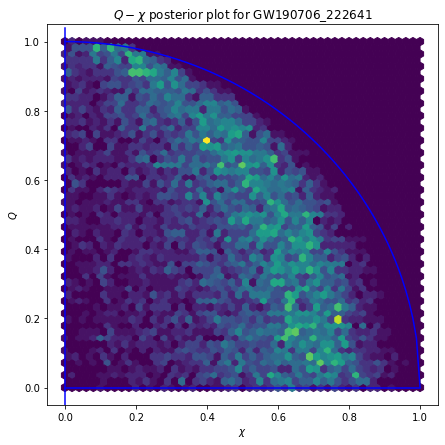

In [43]:
import matplotlib.pyplot as plt

eventname = 'GW190706_222641'
fig, ax = plt.subplots(1,figsize=(7,7))
ax.plot(np.linspace(0,1,100), np.sqrt(1 - np.linspace(0,1,100)**2),c='b')
ax.plot(np.linspace(0,1,100), 0.0*np.linspace(0,1,100),c='b')
ax.axvline(0.0,ymin=0.0,ymax=0.99,c='b')
ax.hexbin(x = points[eventname][:,0], y = points[eventname][:,1],gridsize=50, extent=(0,1,0,1))
ax.set_xlabel("$\chi$")
ax.set_ylabel("$Q$")
ax.set_title(f"$Q-\chi$ posterior plot for {eventname}")
plt.show()